In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [6]:
df = pd.read_excel("AccidentsBig.xlsx")

In [7]:
df.head(3)

Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0               1  78.610393  14.724026             1                  2   
1               2  78.534042  14.762353             1                  3   
2               3  78.470877  14.745606             1                  3   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week      Time  \
0                   1                     1            3  17:42:00   
1                   1                     1            4  17:36:00   
2                   2                     1            5  00:15:00   

   Local_Authority_(District)  ... Pedestrian_Crossing-Physical_Facilities  \
0                          12  ...                                       1   
1                          12  ...                                       5   
2                          12  ...                                       0   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0                 1                   2                        2   
1                 4                   1                        1   
2                 4                   1                        1   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                            1                  E01002849   
1                                            1                  E01002909   
2                                            1                  E01002857   

        Date  
0 2018-01-04  
1 2018-01-05  
2 2018-01-06  

[3 rows x 30 columns]

In [8]:
df.shape

(59998, 30)

In [9]:
import pandas as pd

# Define mappings for categorical columns
category_mappings = {
    "Urban_or_Rural_Area": {1: "Urban", 2: "Rural"},
    "Accident_Severity": {1: "Fatal", 2: "Serious", 3: "Slight"},
    "Day_of_Week": {1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 
                      5: "Thursday", 6: "Friday", 7: "Saturday"},
    "Weather_Conditions": {1: "Fine", 2: "Raining", 3: "Snowing", 4: "Fog", 
                             5: "Other", 6: "Unknown"},
    "Road_Surface_Conditions": {1: "Dry", 2: "Wet", 3: "Snow", 4: "Ice", 
                                5: "Flood", 6: "Oil or Diesel", 7: "Mud"},
    "Road_Type": {1: "Motorway", 2: "A(M)", 3: "A Road", 6: "Minor Road", 7: "B Road", 9: "Unknown"},
    "Junction_Detail": {0: "Not at junction", 1: "Roundabout", 2: "Mini-roundabout", 
                          3: "T-junction", 5: "Slip road", 6: "Crossroads", 7: "Other", 
                          8: "Private drive", 9: "Unknown", -1: "Unknown"},
    "Junction_Control": {-1: "Unknown", 0: "No control", 1: "Auto traffic signal", 
                         2: "Stop sign", 3: "Give way", 4: "Uncontrolled"},
    "Light_Conditions": {1: "Daylight", 4: "Darkness (lit)", 5: "Darkness (unlit)", 
                         6: "Darkness (unknown lighting)", 7: "Unknown"},
    "Pedestrian_Crossing-Human_Control": {0: "None", 1: "School crossing patrol", 
                                          2: "Police officer", -1: "Unknown"},
    "Pedestrian_Crossing-Physical_Facilities": {0: "No crossing", 1: "Zebra", 4: "Traffic lights",
                                                5: "Footbridge/Subway", 7: "Central refuge", 
                                                8: "Other", -1: "Unknown"},
    "Special_Conditions_at_Site": {0: "None", 1: "Roadworks", 2: "Road surface defective",
                                   3: "Oil/Diesel", 4: "Mud", 5: "Ice", 6: "Flood", 7: "Unknown", -1: "Unknown"},
    "Carriageway_Hazards": {0: "None", 1: "Vehicle load", 2: "Other object", 
                             3: "Previous accident", 6: "Flood", 7: "Unknown", -1: "Unknown"},
    "Did_Police_Officer_Attend_Scene_of_Accident": {1: "Yes", 2: "No"},
    "Weekend": {0: "Weekday", 1: "Weekend"}
}

# Apply the mappings
for column, mapping in category_mappings.items():
    if column in df.columns:
        df[column] = df[column].replace(mapping).fillna("Unknown").astype(str)


In [10]:
df.isna().sum()

Accident_Index                                  0
longitude                                       0
latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Day_of_Week                                     0
Time                                            1
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
Junction_Detail                                 0
Junction_Control                                0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Pedestrian_Crossing-Human_Control               0


In [11]:
(df.isna().sum() / df.shape[0])* 100

Accident_Index                                 0.000000
longitude                                      0.000000
latitude                                       0.000000
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Day_of_Week                                    0.000000
Time                                           0.001667
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Junction_Detail                                0.000000
Junction_Control                               0.000000
2nd_Road_Class                                 0

In [12]:
len(df["LSOA_of_Accident_Location"].unique())

9828

In [13]:
df.dropna(subset=["LSOA_of_Accident_Location"], inplace=True)

In [14]:
df.isna().sum()

Accident_Index                                 0
longitude                                      0
latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           1
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

In [15]:
df.duplicated().sum()

0

In [16]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# Convert 'Time' column to hour format
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors='coerce').dt.hour

In [18]:
df["Time"].fillna(df["Time"].mean(),inplace = True)

C:\Users\Pravin\AppData\Local\Temp\ipykernel_12608\448227141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Time"].fillna(df["Time"].mean(),inplace = True)


In [19]:
df.isna().sum()   

Accident_Index                                 0
longitude                                      0
latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59901 entries, 0 to 59997
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               59901 non-null  int64         
 1   longitude                                    59901 non-null  float64       
 2   latitude                                     59901 non-null  float64       
 3   Police_Force                                 59901 non-null  int64         
 4   Accident_Severity                            59901 non-null  object        
 5   Number_of_Vehicles                           59901 non-null  int64         
 6   Number_of_Casualties                         59901 non-null  int64         
 7   Day_of_Week                                  59901 non-null  object        
 8   Time                                         59901 non-null  float64       
 9   

In [21]:
# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Month"] = df["Date"].dt.month

In [22]:
# Remove any invalid values
df = df[df["Number_of_Vehicles"] > 0]
df = df[df["Number_of_Casualties"] > 0]

In [23]:
# Set style for better visualization
sns.set(style="whitegrid")

# This graph shows how accidents are distributed across severity levels (minor, serious, fatal).


C:\Users\Pravin\AppData\Local\Temp\ipykernel_12608\1768365149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident_Severity"], palette="coolwarm")


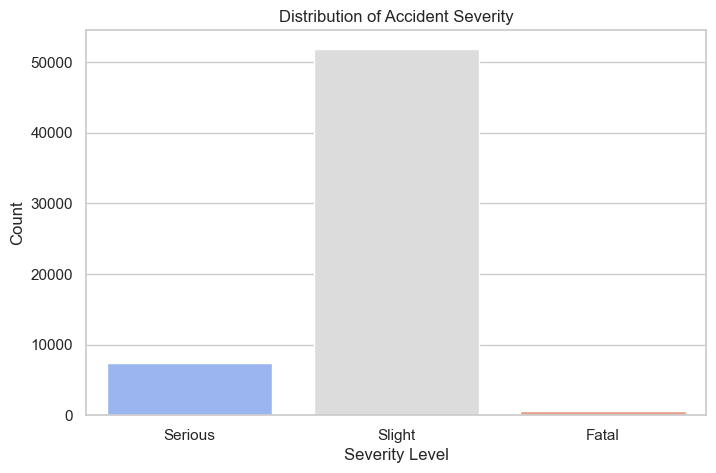

In [25]:
# 1. Distribution of Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Accident_Severity"], palette="coolwarm")
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

# This graph shows which days of the week have the highest number of accidents.


C:\Users\Pravin\AppData\Local\Temp\ipykernel_12608\461178803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Day_of_Week"], palette="viridis")


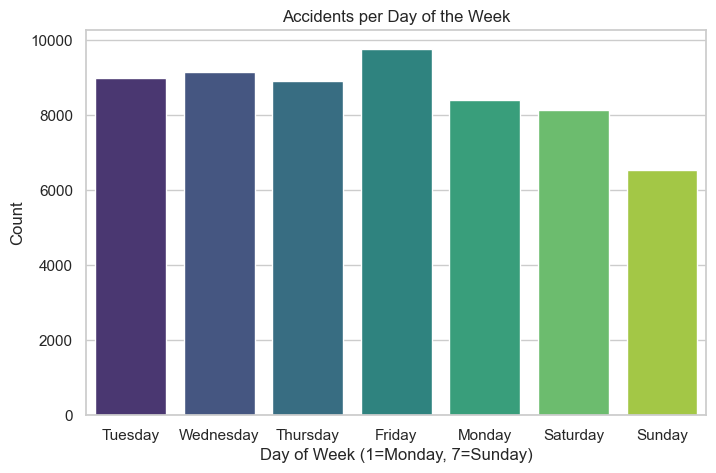

In [27]:
# 2. Accidents per Day of the Week (Seaborn)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Day_of_Week"], palette="viridis")
plt.title("Accidents per Day of the Week")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Count")
plt.show()

# This graph highlights the peak accident hours in a day, useful for traffic control measures.


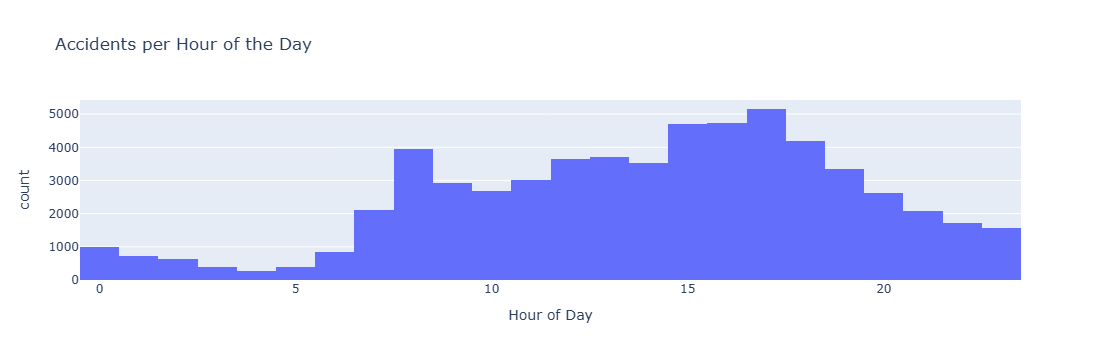

In [29]:
# 3. Accidents per Hour of the Day (Plotly)
fig = px.histogram(df, x="Time", nbins=24, title="Accidents per Hour of the Day", labels={'Time': 'Hour of Day'})
fig.show()


# This graph shows how different weather conditions impact accident occurrences.


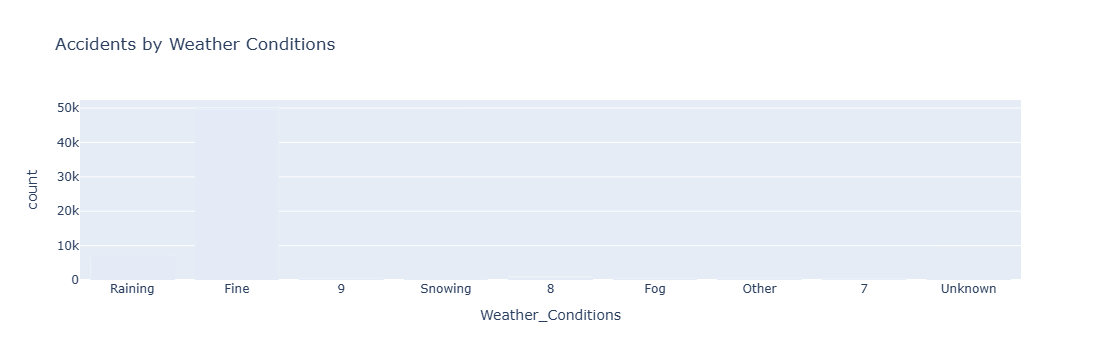

In [31]:
# 5. Accidents by Weather Conditions (Plotly)
fig = px.bar(df, x="Weather_Conditions", title="Accidents by Weather Conditions") # correction
fig.show()

# This graph examines how accidents vary under different lighting conditions (daylight, dark, etc.).


C:\Users\Pravin\AppData\Local\Temp\ipykernel_12608\2394486066.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




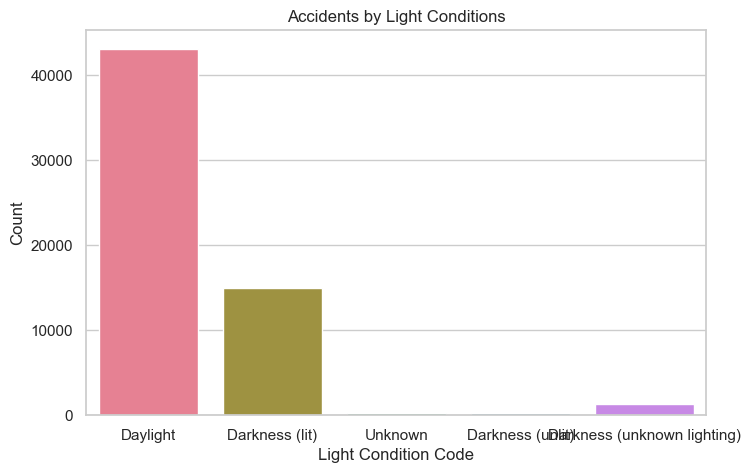

In [33]:
# 6. Accidents by Light Conditions (Seaborn)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Light_Conditions"], palette="husl")
plt.title("Accidents by Light Conditions")
plt.xlabel("Light Condition Code")
plt.ylabel("Count")
plt.show()

# This graph compares the number of accidents occurring in urban and rural areas.


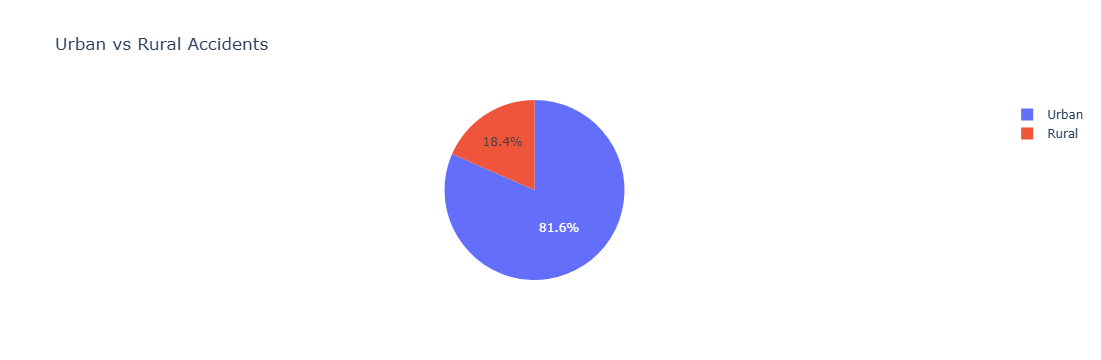

In [35]:
# 7. Urban vs Rural Accidents (Plotly)
fig = px.pie(df, names="Urban_or_Rural_Area", title="Urban vs Rural Accidents")
fig.show()

# This graph identifies accident trends across different months.


C:\Users\Pravin\AppData\Local\Temp\ipykernel_12608\800084690.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




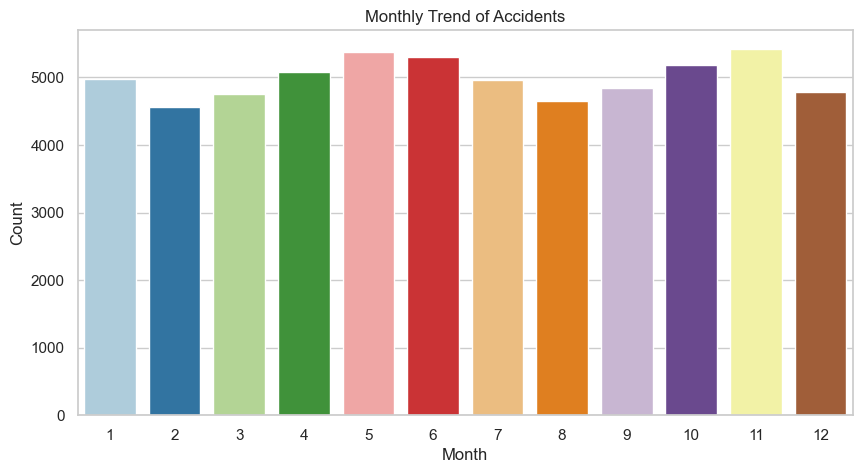

In [37]:
# 8. Monthly Trend of Accidents (Seaborn)
plt.figure(figsize=(10, 5)) # Change line plot
sns.countplot(x=df["Month"], palette="Paired")
plt.title("Monthly Trend of Accidents")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# This graph shows if accidents involving more vehicles lead to higher casualties.


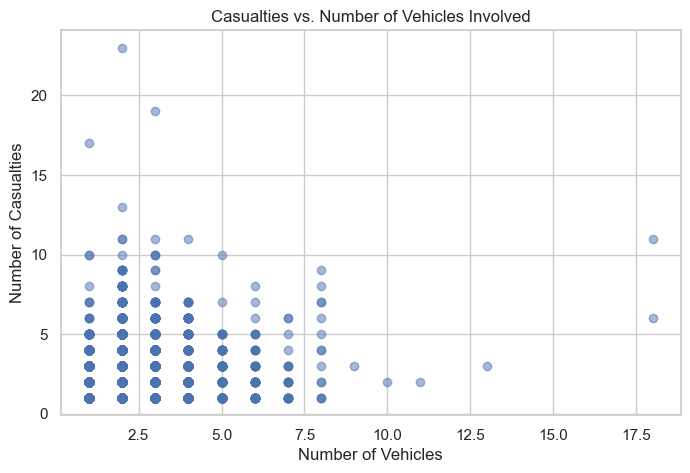

In [39]:
# 9. Casualties vs. Number of Vehicles (Matplotlib)
plt.figure(figsize=(8, 5))
plt.scatter(df["Number_of_Vehicles"], df["Number_of_Casualties"], alpha=0.5) # No Need
plt.title("Casualties vs. Number of Vehicles Involved")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()

# This heatmap identifies relationships between numerical variables, e.g., if more vehicles lead to more casualties.


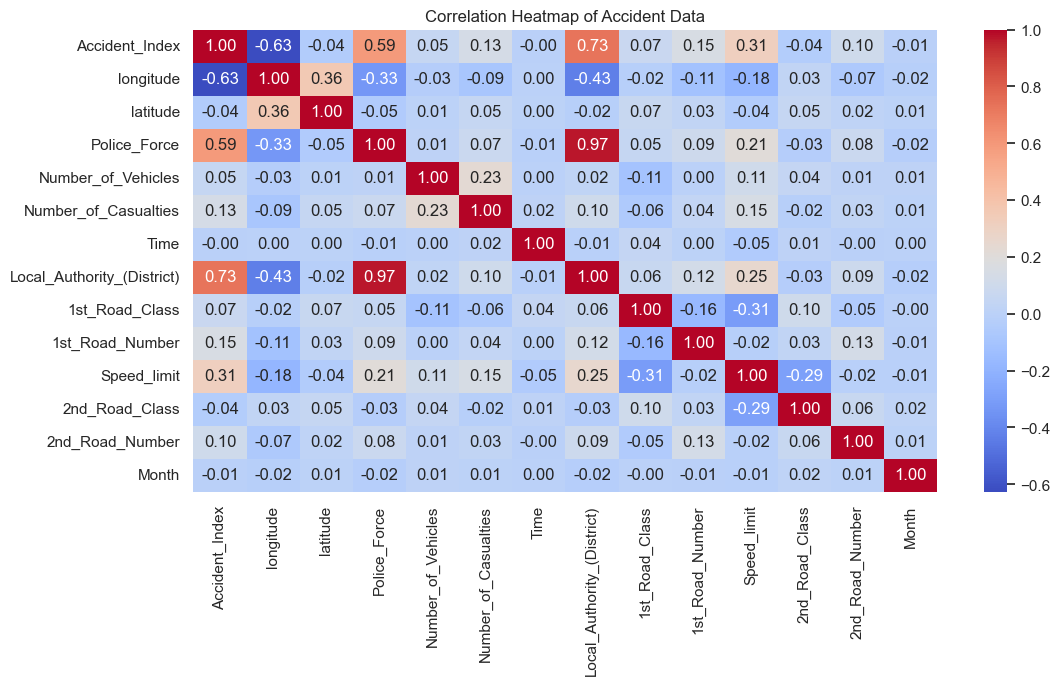

In [41]:
# 10. Correlation Heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f") # Not apporopriate
plt.title("Correlation Heatmap of Accident Data")
plt.show()

# This graph shows how different road surface conditions contribute to accidents.


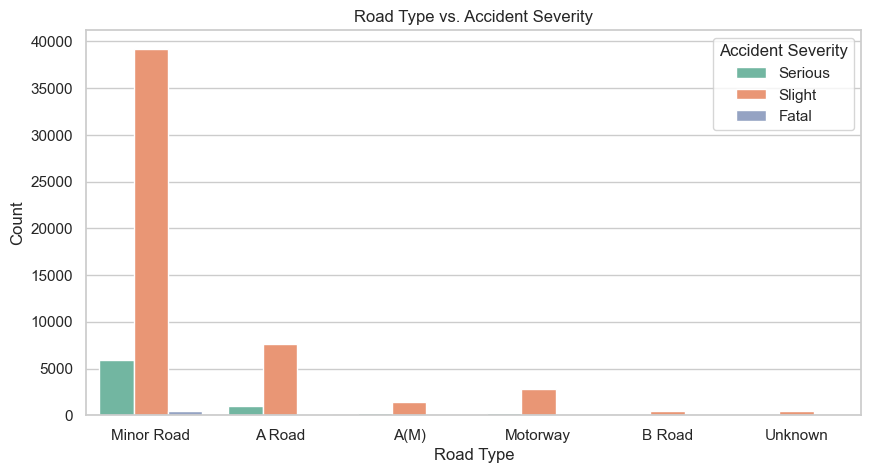

In [43]:
# 11. Road Type vs. Accident Severity
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Road_Type"], hue=df["Accident_Severity"], palette="Set2")
plt.title("Road Type vs. Accident Severity")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.show()

# This graph analyzes the effect of speed limits on accident casualties.


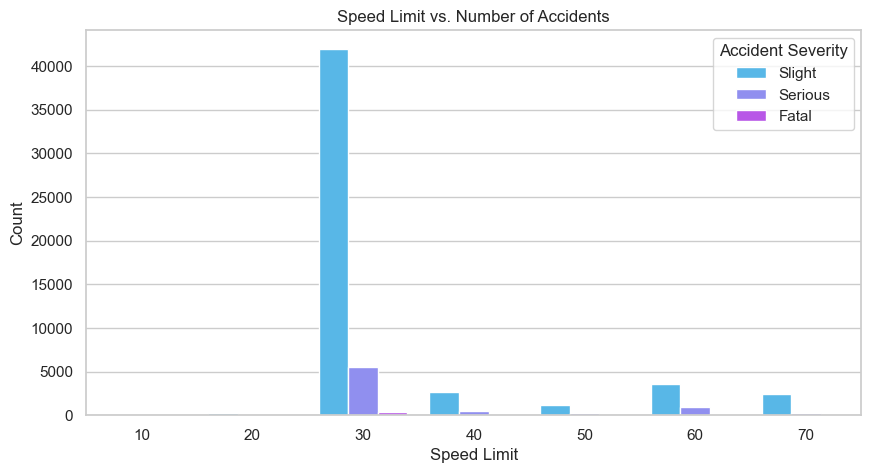

In [45]:
# 12. Speed Limit vs. Number of Accidents
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Speed_limit"], hue=df["Accident_Severity"], palette="cool")
plt.title("Speed Limit vs. Number of Accidents")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.show()

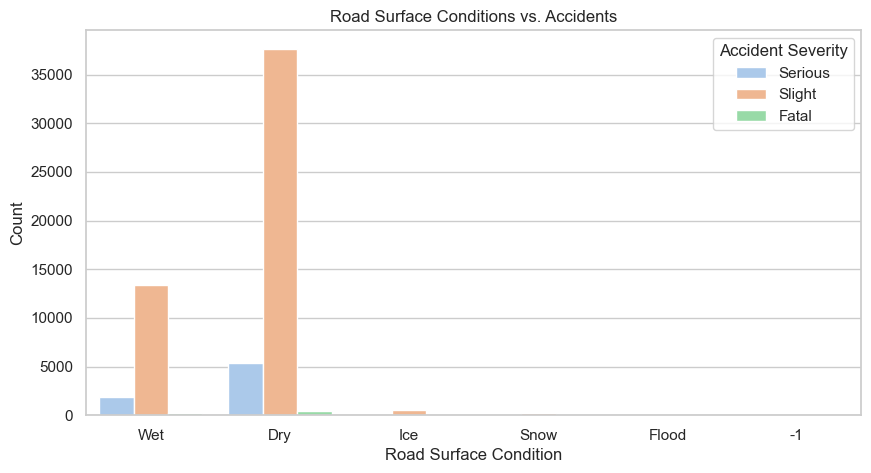

In [46]:
# 15. Road Surface Conditions vs. Accidents
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Road_Surface_Conditions"], hue=df["Accident_Severity"], palette="pastel")
plt.title("Road Surface Conditions vs. Accidents")
plt.xlabel("Road Surface Condition")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.show()

# 4. Statistical Insight: Weekend vs. Weekday Accidents


In [48]:
# Hypothesis: Do weekends see a significantly higher number of accidents than weekdays?
df["Weekend"] = df["Day_of_Week"].apply(lambda x: 1 if x in [6, 7] else 0)
weekend_accidents = df[df["Weekend"] == 1]["Number_of_Casualties"]
weekday_accidents = df[df["Weekend"] == 0]["Number_of_Casualties"]


# Perform t-test


In [50]:
t_stat, p_value = ttest_ind(weekend_accidents, weekday_accidents)
print(f"T-test result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
# Interpretation: If p-value < 0.05, weekends have a significantly different accident rate.

T-test result: t-statistic = nan, p-value = nan


# 5. Predictive Modeling: Accident Likelihood Prediction


In [52]:
# Define features and target variable
features = ["Time", "Day_of_Week", "Number_of_Vehicles", "Weather_Conditions"]
df = df.dropna(subset=features)  # Drop rows with missing values
X = pd.get_dummies(df[features], drop_first=True)  # Convert categorical to numeric
y = (df["Number_of_Casualties"] > df["Number_of_Casualties"].median()).astype(int)  # Binary target

In [53]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Make predictions
y_pred = model.predict(X_test)


# The model predicts accident likelihood based on time, day, number of vehicles, and weather conditions.


In [57]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      9385
           1       0.39      0.06      0.10      2596

    accuracy                           0.78     11981
   macro avg       0.59      0.52      0.49     11981
weighted avg       0.70      0.78      0.71     11981



In [58]:
df.head()

Accident_Index  longitude   latitude  Police_Force Accident_Severity  \
0               1  78.610393  14.724026             1           Serious   
1               2  78.534042  14.762353             1            Slight   
2               3  78.470877  14.745606             1            Slight   
3               4  78.557994  14.667128             1            Slight   
4               5  78.576431  14.703443             1            Slight   

   Number_of_Vehicles  Number_of_Casualties Day_of_Week  Time  \
0                   1                     1     Tuesday  17.0   
1                   1                     1   Wednesday  17.0   
2                   2                     1    Thursday   0.0   
3                   1                     1      Friday  10.0   
4                   1                     1      Monday  21.0   

   Local_Authority_(District)  ... Weather_Conditions  \
0                          12  ...            Raining   
1                          12  ...               Fine   
2                          12  ...               Fine   
3                          12  ...               Fine   
4                          12  ...               Fine   

   Road_Surface_Conditions  Special_Conditions_at_Site Carriageway_Hazards  \
0                      Wet                        None                None   
1                      Dry                        None                None   
2                      Dry                        None                None   
3                      Dry                        None                None   
4                      Wet                        None                None   

   Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
0                Urban                                         Yes   
1                Urban                                         Yes   
2                Urban                                         Yes   
3                Urban                                         Yes   
4                Urban                                         Yes   

  LSOA_of_Accident_Location       Date  Month Weekend  
0                 E01002849 2018-01-04      1       0  
1                 E01002909 2018-01-05      1       0  
2                 E01002857 2018-01-06      1       0  
3                 E01002840 2018-01-07      1       0  
4                 E01002863 2018-01-10      1       0  

[5 rows x 32 columns]

In [59]:
df

Accident_Index  longitude   latitude  Police_Force Accident_Severity  \
0                   1  78.610393  14.724026             1           Serious   
1                   2  78.534042  14.762353             1            Slight   
2                   3  78.470877  14.745606             1            Slight   
3                   4  78.557994  14.667128             1            Slight   
4                   5  78.576431  14.703443             1            Slight   
...               ...        ...        ...           ...               ...   
59993           59994  70.144710  24.586263            12            Slight   
59994           59995  87.530231  25.803174            12            Slight   
59995           59996  70.546520  25.663263            12            Slight   
59996           59997  77.030311  25.308850            12            Slight   
59997           59998  69.094869  21.735663            12            Slight   

       Number_of_Vehicles  Number_of_Casualties Day_of_Week  Time  \
0                       1                     1     Tuesday  17.0   
1                       1                     1   Wednesday  17.0   
2                       2                     1    Thursday   0.0   
3                       1                     1      Friday  10.0   
4                       1                     1      Monday  21.0   
...                   ...                   ...         ...   ...   
59993                   2                     2   Wednesday   8.0   
59994                   2                     1   Wednesday   8.0   
59995                   2                     1   Wednesday   8.0   
59996                   3                     2   Wednesday   8.0   
59997                   2                     2   Wednesday  12.0   

       Local_Authority_(District)  ... Weather_Conditions  \
0                              12  ...            Raining   
1                              12  ...               Fine   
2                              12  ...               Fine   
3                              12  ...               Fine   
4                              12  ...               Fine   
...                           ...  ...                ...   
59993                         186  ...               Fine   
59994                         189  ...               Fine   
59995                         189  ...               Fine   
59996                         181  ...               Fine   
59997                         182  ...            Raining   

       Road_Surface_Conditions  Special_Conditions_at_Site  \
0                          Wet                        None   
1                          Dry                        None   
2                          Dry                        None   
3                          Dry                        None   
4                          Wet                        None   
...                        ...                         ...   
59993                      Dry                        None   
59994                      Dry                        None   
59995                      Dry                        None   
59996                      Dry                        None   
59997                      Wet                        None   

      Carriageway_Hazards  Urban_or_Rural_Area  \
0                    None                Urban   
1                    None                Urban   
2                    None                Urban   
3                    None                Urban   
4                    None                Urban   
...                   ...                  ...   
59993                None                Urban   
59994                None                Rural   
59995                None                Rural   
59996                None                Rural   
59997                None                Rural   

      Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                             Yes                 E0100

In [60]:
df.to_csv("PythonProject.csv")